In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from  sklearn.linear_model import LinearRegression, Ridge
from sklearn.neural_network import MLPRegressor
!pip install catboost
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
# !pip install cufflinks
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import os
import re
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
data=pd.read_csv("employees_data.csv")

In [ ]:
data

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,9/30/2008,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,11/30/2008,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,3/10/2008,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,11/3/2008,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,7/24/2008,Female,Service,No,3,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,12/30/2008,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,1/19/2008,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,11/5/2008,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,1/10/2008,Female,Service,No,2,5.0,5.9,0.52


In [ ]:
data.shape

(22750, 9)

UNDERSTANDING DATA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  int64  
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 1.6+ MB


In [ ]:
data.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


DEALING WITH MISSING VALUES

In [ ]:
data.isna().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [ ]:
data.dropna(subset = ["Burn Rate"], inplace=True)
print(data.shape)

(21626, 9)


In [ ]:
data = data.fillna(data.median())
print("Are there any value missing now? "+str(data.isna().any().any()))

Are there any value missing now? False


In [ ]:
print("Numerical valued features counts:----------", end="\n\n")

print(data["Designation"].value_counts(), end="\n\n")
print(data["Resource Allocation"].value_counts(), end="\n\n")
print(data["Mental Fatigue Score"].value_counts(), end="\n\n")

Numerical valued features counts:----------

2    7206
3    5698
1    4632
4    2275
0    1439
5     376
Name: Designation, dtype: int64

4.0     4972
5.0     3670
3.0     3028
6.0     2817
2.0     1988
7.0     1880
1.0     1701
8.0      992
9.0      428
10.0     150
Name: Resource Allocation, dtype: int64

5.9    2384
6.0     451
5.8     436
6.3     432
5.6     426
       ... 
0.2      22
0.6      22
0.4      16
0.1      15
0.3      11
Name: Mental Fatigue Score, Length: 101, dtype: int64



EXPLORATORY DATA ANALYSIS

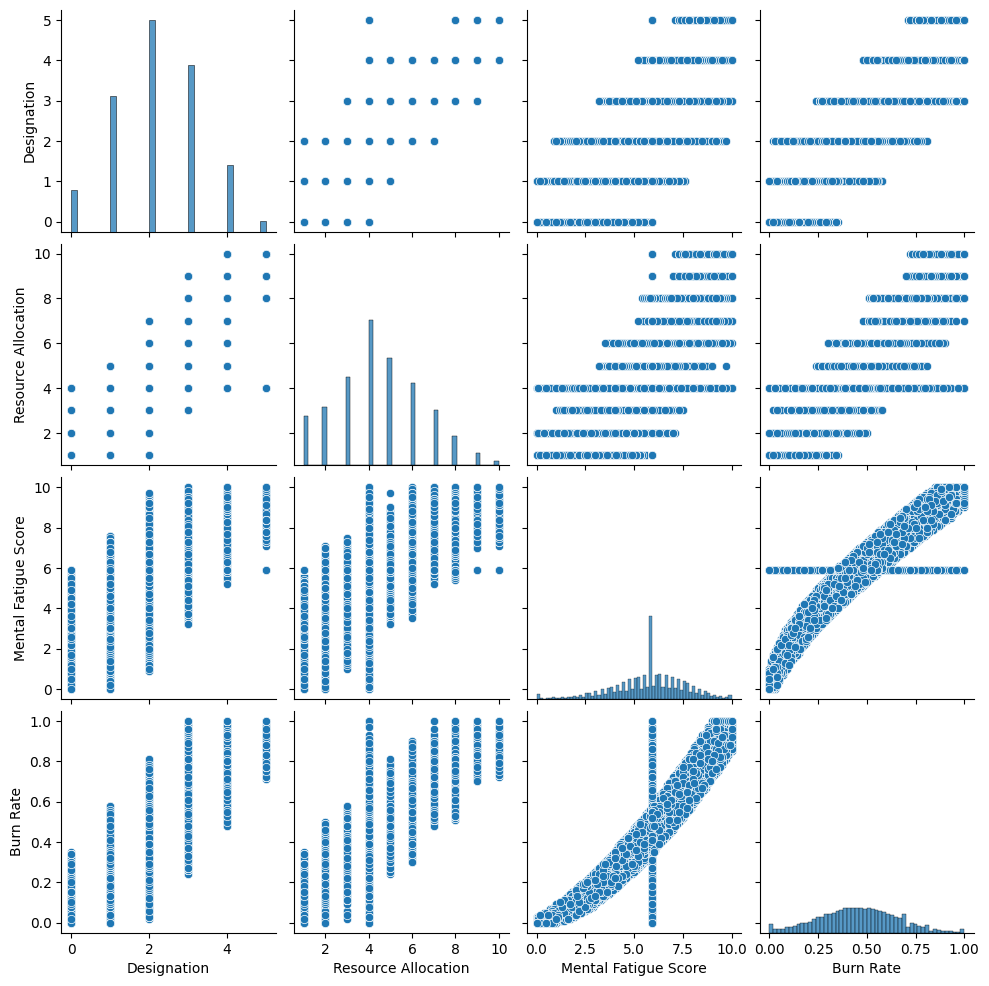

In [ ]:
sns_plot = sns.pairplot(data, height=2.5)
sns_plot.savefig("pairplot.png")

CHCKING DATA NORMALITY

In [ ]:
def normalize_features(original_data):
    fitted_data, fitted_lambda = stats.boxcox(original_data)
    fig, ax = plt.subplots(1, 2)

    # plotting the original data(non-normal) and
    # fitted data (normal)
    sns.distplot(original_data, hist = False, kde = True,
                kde_kws = {'shade': True, 'linewidth': 2},
                label = "Non-Normal", color ="green", ax = ax[0])

    sns.distplot(fitted_data, hist = False, kde = True,
                kde_kws = {'shade': True, 'linewidth': 2},
                label = "Normal", color ="green", ax = ax[1])

    # adding legends to the subplots
    plt.legend(loc = "upper right")

    # rescaling the subplots
    fig.set_figheight(5)
    fig.set_figwidth(10)
    return fitted_data

array([3.47389371, 5.23694297, 6.47713204, ..., 6.63544412, 6.63544412,
       9.76745554])

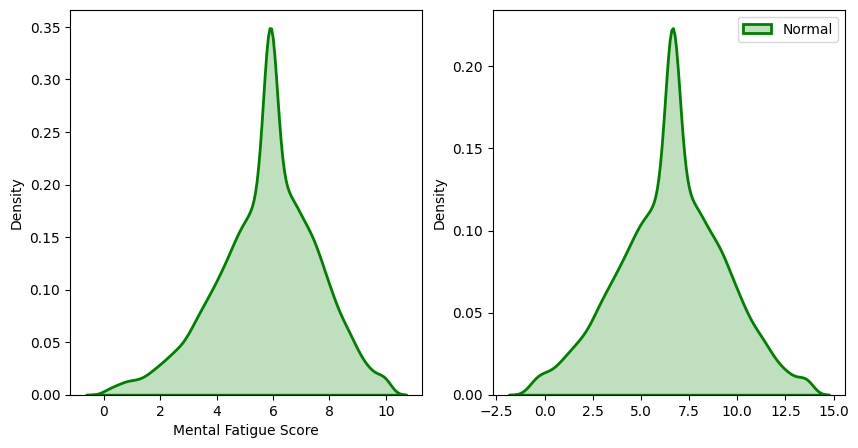

In [ ]:
from scipy import stats
import scipy.stats as st

original_data = data.drop(data[data["Mental Fatigue Score"] <= 0.0].index)["Mental Fatigue Score"]
normalize_features(original_data)

array([0.80864742, 0.        , 0.80864742, ..., 1.40748329, 0.80864742,
       1.40748329])

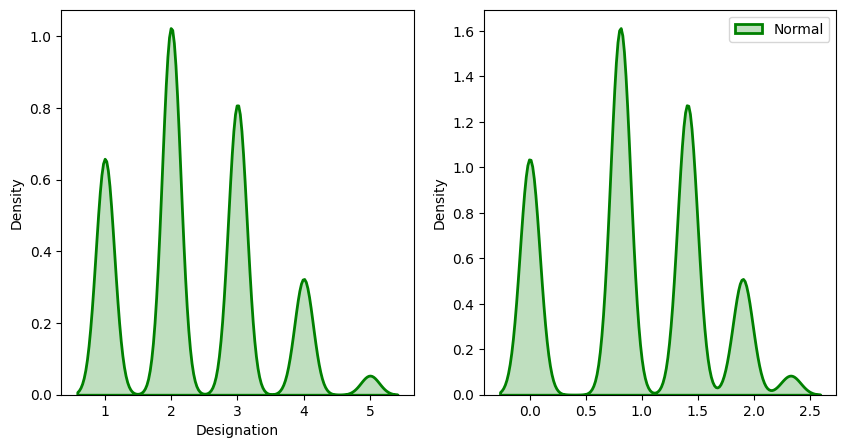

In [ ]:
original_data = data.drop(data[data["Designation"] <= 0.0].index)["Designation"]
normalize_features(original_data)

array([1.67647646, 0.89952171, 2.38320075, ..., 4.25917477, 3.04190815,
       3.66471678])

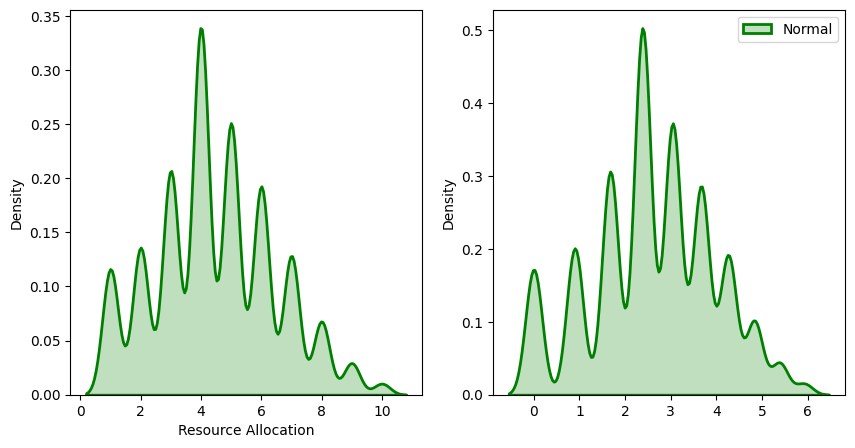

In [ ]:
original_data = data.drop(data[data["Resource Allocation"] <= 0.0].index)["Resource Allocation"]
normalize_features(original_data)

array([-0.93445617, -0.68549774, -0.5364433 , ..., -0.28703148,
       -0.5029999 , -0.4044282 ])

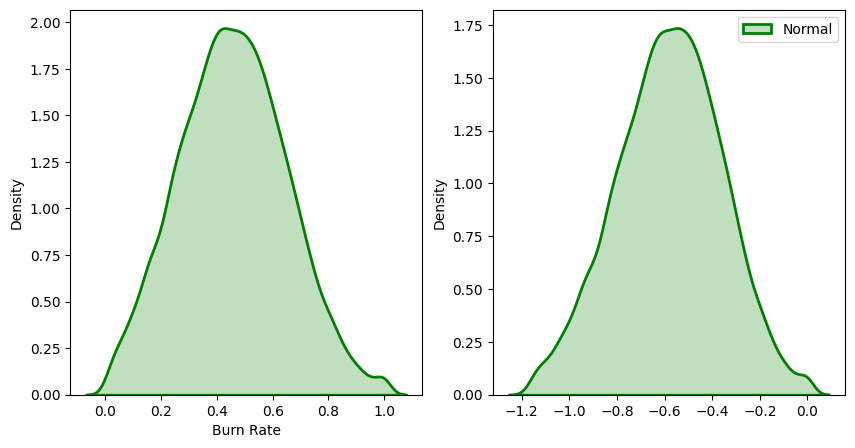

In [ ]:
original_data = data.drop(data[data["Burn Rate"] <= 0.0].index)["Burn Rate"]
normalize_features(original_data)

FEATURE ENGINEERING

Date of Joining

In [ ]:
current_date = pd.to_datetime('today')

data["Date of Joining"] = pd.to_datetime(data["Date of Joining"])


ENCODING FEATURES

In [ ]:
print(data["Gender"].value_counts(), end="\n\n")
print(data["Company Type"].value_counts(), end="\n\n")
print(data["WFH Setup Available"].value_counts(), end="\n\n")

Female    11349
Male      10277
Name: Gender, dtype: int64

Service    14124
Product     7502
Name: Company Type, dtype: int64

Yes    11685
No      9941
Name: WFH Setup Available, dtype: int64



In [ ]:
one = 1
zero = 0

def gender_encoder(data):
    if data["Gender"] == "Female":
        return one
    return zero


def wfh_setup_encoder(data):
    if data["WFH Setup Available"] == "Yes":
        return one
    return zero


def company_encoder(data):
    if data["Company Type"] == "Service":
        return one
    return zero



data["Gender"] = data.apply(gender_encoder, axis=1)
data["WFH Setup Available"] = data.apply(wfh_setup_encoder, axis=1)
data["Company Type"] = data.apply(company_encoder, axis=1)



NORMALIZE DATA

In [ ]:
norm_cols = ["Designation", "Resource Allocation", "Mental Fatigue Score"]


data_min = data[norm_cols].min()
data_max = data[norm_cols].max()

data[norm_cols] = (data[norm_cols] - data_min)/(data_max - data_min)


In [ ]:
data.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,1,1,0,0.4,0.222222,0.38,0.16
1,fffe3700360033003500,2008-11-30,0,1,1,0.2,0.111111,0.50,0.36
2,fffe31003300320037003900,2008-03-10,1,0,1,0.4,0.333333,0.58,0.49
3,fffe32003400380032003900,2008-11-03,0,1,1,0.2,0.000000,0.26,0.20
4,fffe31003900340031003600,2008-07-24,1,1,0,0.6,0.666667,0.69,0.52


In [ ]:
data.corr()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
Gender,1.000000,0.011660,0.073740,-0.111794,-0.136407,-0.139104,-0.154895
Company Type,0.011660,1.000000,0.003410,0.006597,0.007235,0.002631,0.004281
WFH Setup Available,0.073740,0.003410,1.000000,-0.230274,-0.276793,-0.263712,-0.306266
Designation,-0.111794,0.006597,-0.230274,1.000000,0.851383,0.657882,0.737556
Resource Allocation,-0.136407,0.007235,-0.276793,0.851383,1.000000,0.740061,0.829632
Mental Fatigue Score,-0.139104,0.002631,-0.263712,0.657882,0.740061,1.000000,0.898926
Burn Rate,-0.154895,0.004281,-0.306266,0.737556,0.829632,0.898926,1.000000


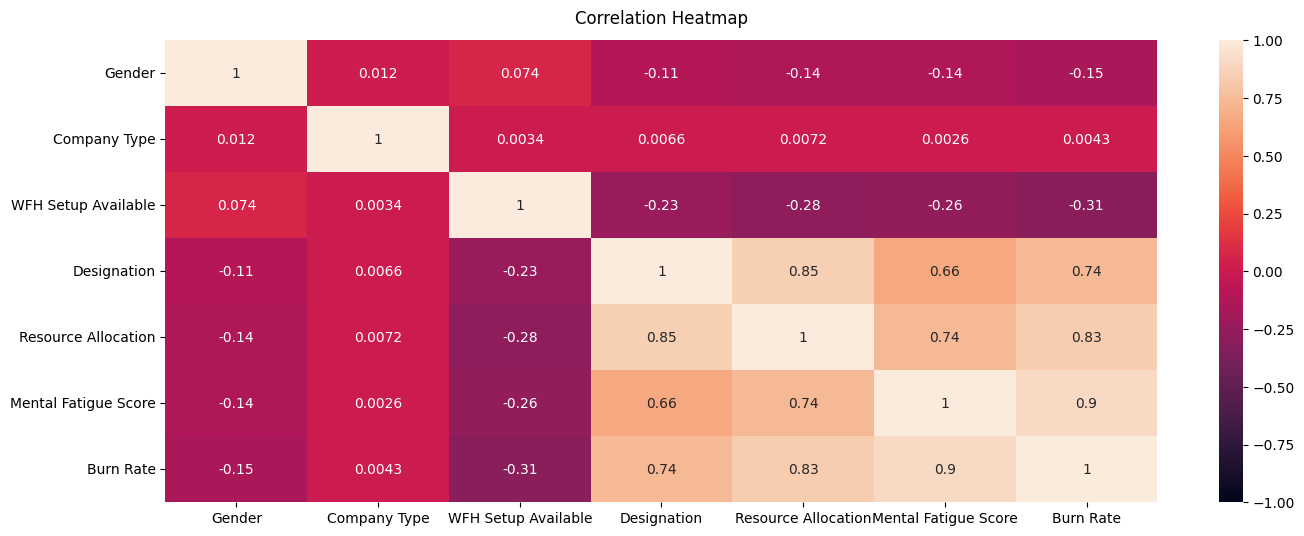

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.savefig("correlation_heatmap.png")

In [ ]:
data=data.drop(columns=['Employee ID','Date of Joining'],axis=1)
data.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,1,1,0,0.4,0.222222,0.38,0.16
1,0,1,1,0.2,0.111111,0.50,0.36
2,1,0,1,0.4,0.333333,0.58,0.49
3,0,1,1,0.2,0.000000,0.26,0.20
4,1,1,0,0.6,0.666667,0.69,0.52


In [ ]:
x=data.drop(columns=['Burn Rate'],axis=1)
y=data['Burn Rate']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
print(x.shape,x_train.shape,x_test.shape)

(21626, 6) (17300, 6) (4326, 6)


Scaling the Data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

TRAINING AND PREDICTIONS

Linear Regression

In [ ]:
model_lr=LinearRegression()
model_lr.fit(x_train,y_train)
#prediction on training data
train_pred1=model_lr.predict(x_train)
#R squared error
error_score=r2_score(y_train,train_pred1)
print("R squared error:",error_score)


R squared error: 0.8700977194492916


Visualize the actual burn rate and predicted burn rate

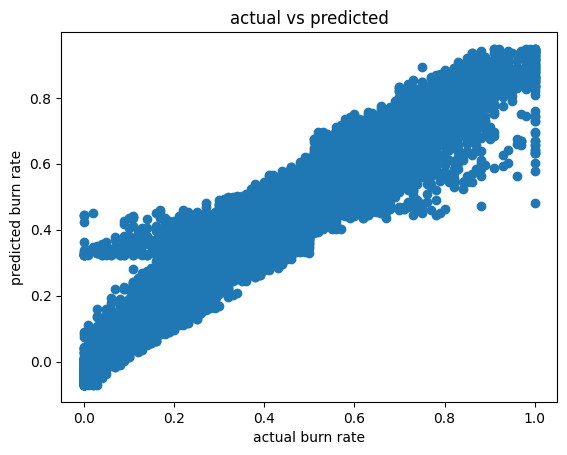

In [ ]:
plt.scatter(y_train,train_pred1)
plt.xlabel("actual burn rate")
plt.ylabel("predicted burn rate")
plt.title("actual vs predicted")
plt.show()

Ridge

In [ ]:
model_rg=Ridge()
model_rg.fit(x_train,y_train)
train_pred2=model_rg.predict(x_train)
r2=r2_score(y_train,train_pred2)
print("error_score:",r2)

error_score: 0.8700977172747654


Visualize the actual burn rate and predicted burn rate using ridge

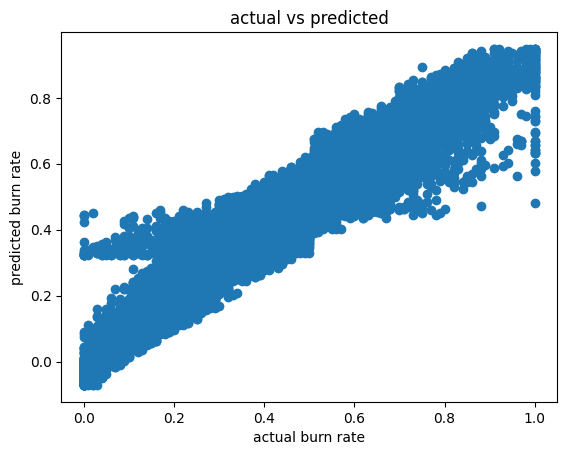

In [ ]:
plt.scatter(y_train,train_pred2)
plt.xlabel("actual burn rate")
plt.ylabel("predicted burn rate")
plt.title("actual vs predicted")
plt.show()

Random Forest Regression

In [ ]:
model_r=RandomForestRegressor()
model_r.fit(x_train,y_train)
train_pred3=model_r.predict(x_train)
r2=r2_score(y_train,train_pred3)
print("error_score:",r2)

error_score: 0.9314856123473443


Visualize the actual burn rate and predicted burn rate using Random Forest Regression algorithm

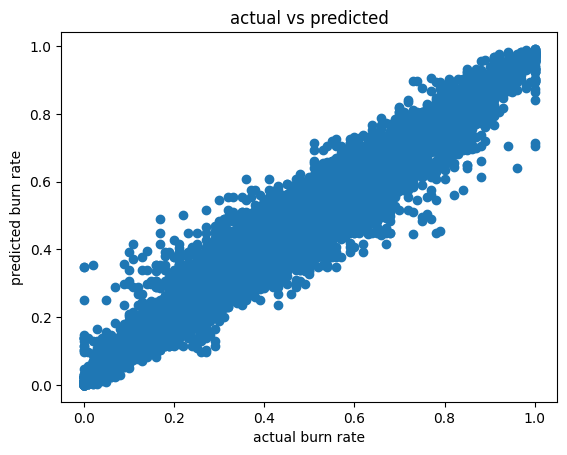

In [ ]:
plt.scatter(y_train,train_pred3)
plt.xlabel("actual burn rate")
plt.ylabel("predicted burn rate")
plt.title("actual vs predicted")
plt.show()

Cat boost regressor

In [ ]:
model_cat=CatBoostRegressor()
model_cat.fit(x_train,y_train)
train_pred4=model_cat.predict(x_train)
r2=r2_score(y_train,train_pred4)
print(r2)

Learning rate set to 0.064238
0:	learn: 0.1880059	total: 4.18ms	remaining: 4.18s
1:	learn: 0.1785689	total: 7.08ms	remaining: 3.53s
2:	learn: 0.1696181	total: 9.89ms	remaining: 3.29s
3:	learn: 0.1613765	total: 12.7ms	remaining: 3.17s
4:	learn: 0.1536060	total: 15.3ms	remaining: 3.05s
5:	learn: 0.1464838	total: 18ms	remaining: 2.98s
6:	learn: 0.1397766	total: 20.8ms	remaining: 2.95s
7:	learn: 0.1335843	total: 23.6ms	remaining: 2.92s
8:	learn: 0.1277638	total: 26.3ms	remaining: 2.89s
9:	learn: 0.1225542	total: 28.9ms	remaining: 2.86s
10:	learn: 0.1176557	total: 31.5ms	remaining: 2.83s
11:	learn: 0.1131351	total: 34.1ms	remaining: 2.81s
12:	learn: 0.1089693	total: 36.7ms	remaining: 2.79s
13:	learn: 0.1050767	total: 39.4ms	remaining: 2.77s
14:	learn: 0.1015750	total: 42ms	remaining: 2.75s
15:	learn: 0.0982789	total: 44.6ms	remaining: 2.74s
16:	learn: 0.0952473	total: 47.2ms	remaining: 2.73s
17:	learn: 0.0924700	total: 49.9ms	remaining: 2.72s
18:	learn: 0.0899958	total: 52.5ms	remaining: 2.

Visualize the actual burn rate and predicted burn rate using cat boost regressor algorithm

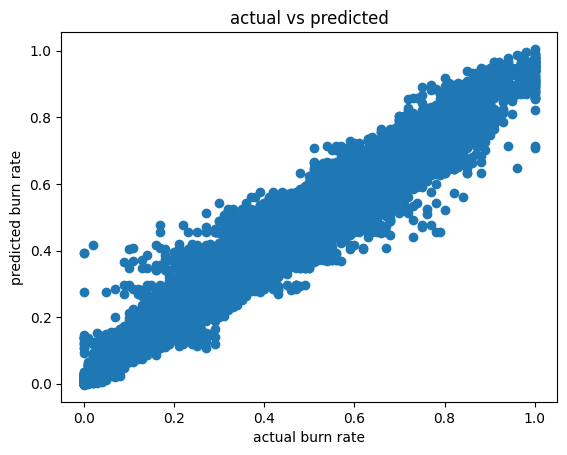

In [ ]:
plt.scatter(y_train,train_pred4)
plt.xlabel("actual burn rate")
plt.ylabel("predicted burn rate")
plt.title("actual vs predicted")
plt.show()

MLP regressor

In [ ]:
model_mlp=MLPRegressor(random_state=2)
model_mlp.fit(x_train,y_train)
train_pred5=model_mlp.predict(x_train)
r2=r2_score(y_train,train_pred5)
print(r2)

0.892432766049763


Visualize the actual burn rate and predicted burn rate using MLP regressor algorithm

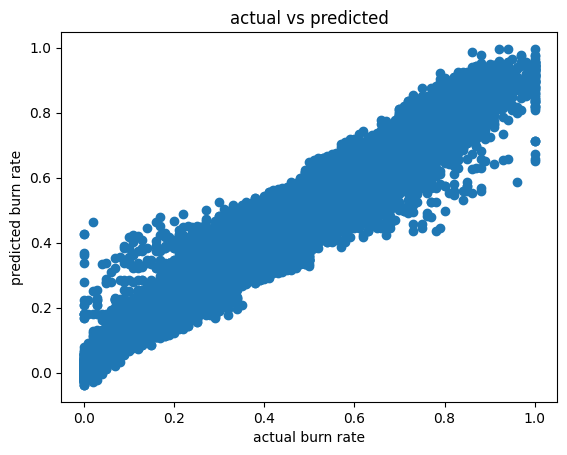

In [ ]:
plt.scatter(y_train,train_pred5)
plt.xlabel("actual burn rate")
plt.ylabel("predicted burn rate")
plt.title("actual vs predicted")
plt.show()

From the above results Random Forest Regressor model is working well with the data

prediction on test data using random forest regression algorithm

In [ ]:
test_pred=model_r.predict(x_test)
#Rsquared error
error_score=r2_score(y_test,test_pred)
print("r2 quared error:",error_score)



r2 quared error: 0.8935126480757827


visualize the actual burn rate and predicted burn rate

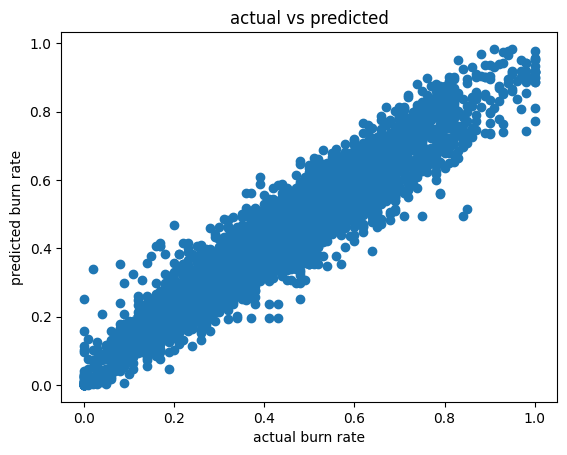

In [ ]:
plt.scatter(y_test,test_pred)
plt.xlabel("actual burn rate")
plt.ylabel("predicted burn rate")
plt.title("actual vs predicted")
plt.show()

In [ ]:
import pickle

In [ ]:
pickle.dump(model_r,open('RandomForestModel.pkl','wb'))

In [ ]:
model_r.predict(pd.DataFrame([['1','1','0','0.4','0.222222','0.38']],columns=['Gender','Company Type','WFH Setup Available','Designation','Resource Allocation','Mental Fatigue Score']))

array([0.52767594])